In [1]:
from dataset import SizeDataset, RegDataset
from train import create_dataloader
from torch.utils.data import DataLoader
import yaml
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [13]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols, figsize=(20, 20))
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title("Label: "+ str(int(title)))
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()

In [3]:
cfg = yaml.safe_load(open('../configs/ant_size_local.yaml'))

In [90]:
transforms = A.Compose([
        A.Rotate(-cfg['rotate_deg'], cfg['rotate_deg']),
        A.Flip(p=cfg['flip_prob']),
        A.ColorJitter(p=cfg['color_jitter']),
        A.CoarseDropout(p=cfg['dropout'], max_height=15, max_width=15, max_holes=4),
        A.GaussNoise(p=cfg['noise']),
        A.ToSepia(p=cfg['sepia']),
        A.ToFloat(max_value=255.0),  
        ToTensorV2()
    ])

In [71]:
bt = A.Compose([
    A.ToFloat(max_value=255.0),
    ToTensorV2()
])

In [91]:
data_t = create_dataloader(cfg, split='train', transforms=transforms)
data_b = create_dataloader(cfg, split='train', transforms=bt)

In [4]:
reg_dataset = RegDataset(cfg)  

In [ ]:
data_r = DataLoader(
    reg_dataset,
    batch_size=16,
    shufflie=False,
    num_workers=1
)

In [78]:
# define transformation
#transforms = Transform(cfg)


# create untransformed
base_dataset = SizeDataset(cfg)

In [79]:
data_t = DataLoader(
    transform_dataset, 
    batch_size=16, 
    shuffle=False, 
    num_workers=1
)

data_u = DataLoader(
    base_dataset, 
    batch_size=16, 
    shuffle=False, 
    num_workers=1
)

In [53]:
images_base = {}
datas, labels = next(iter(data_b))
batch = list(zip(datas, labels))

for data, label in batch:
    data_np = data.numpy()
    data_np = np.transpose(data_np, (1,2,0))
    images_base[label] = data_np

In [93]:
images_trans = {}
datas, labels = next(iter(data_t))
batch = list(zip(datas, labels))

for data, label in batch:
    data_np = data.numpy()
    data_np = np.transpose(data_np, (1,2,0))
    images_trans[label] = data_np

IndexError: index 16 is out of bounds for axis 0 with size 16

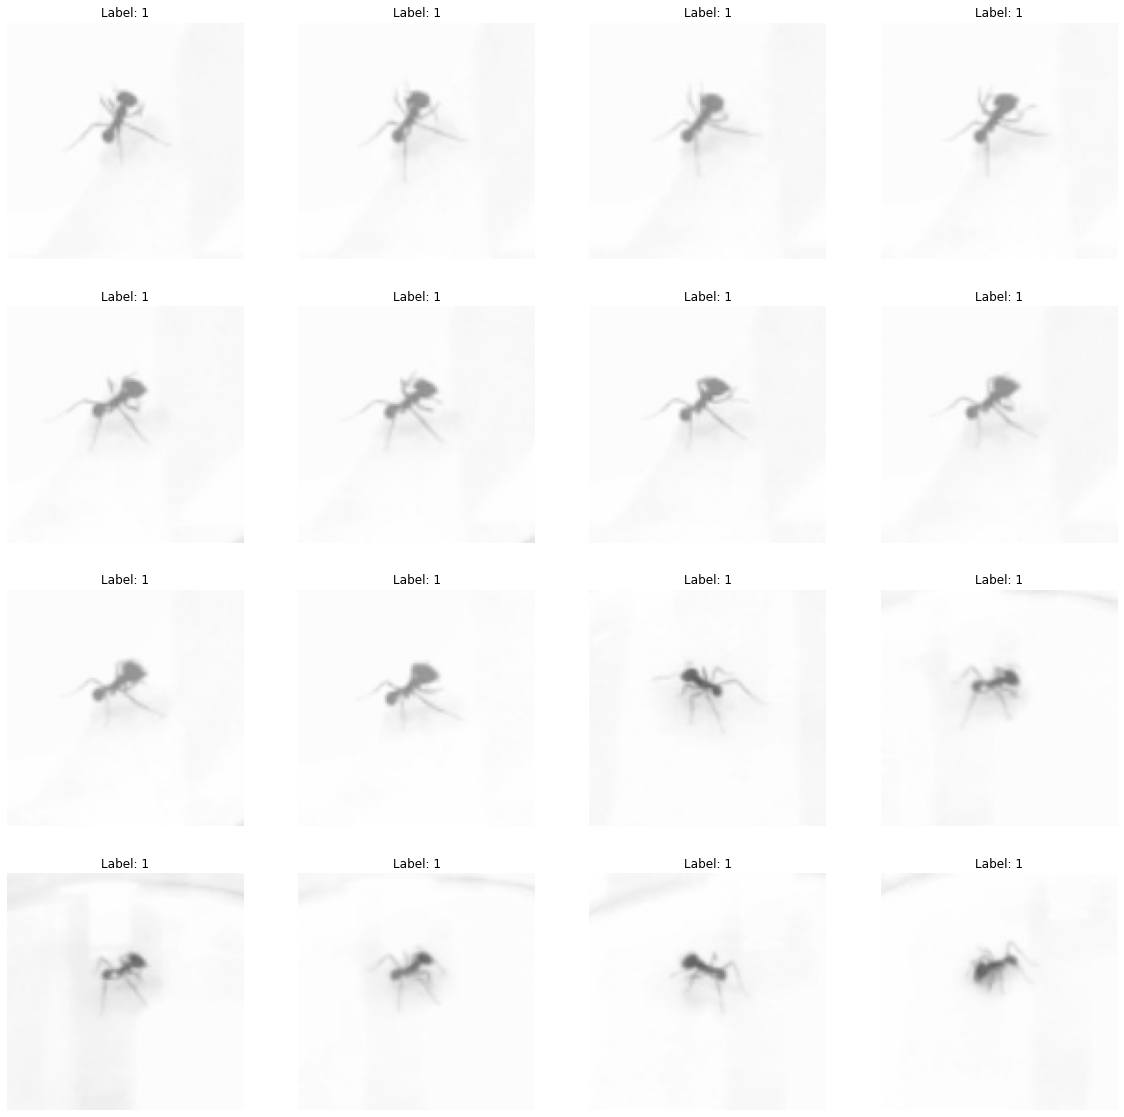

In [54]:
display_multiple_img(images_base, 4, 4)

IndexError: index 16 is out of bounds for axis 0 with size 16

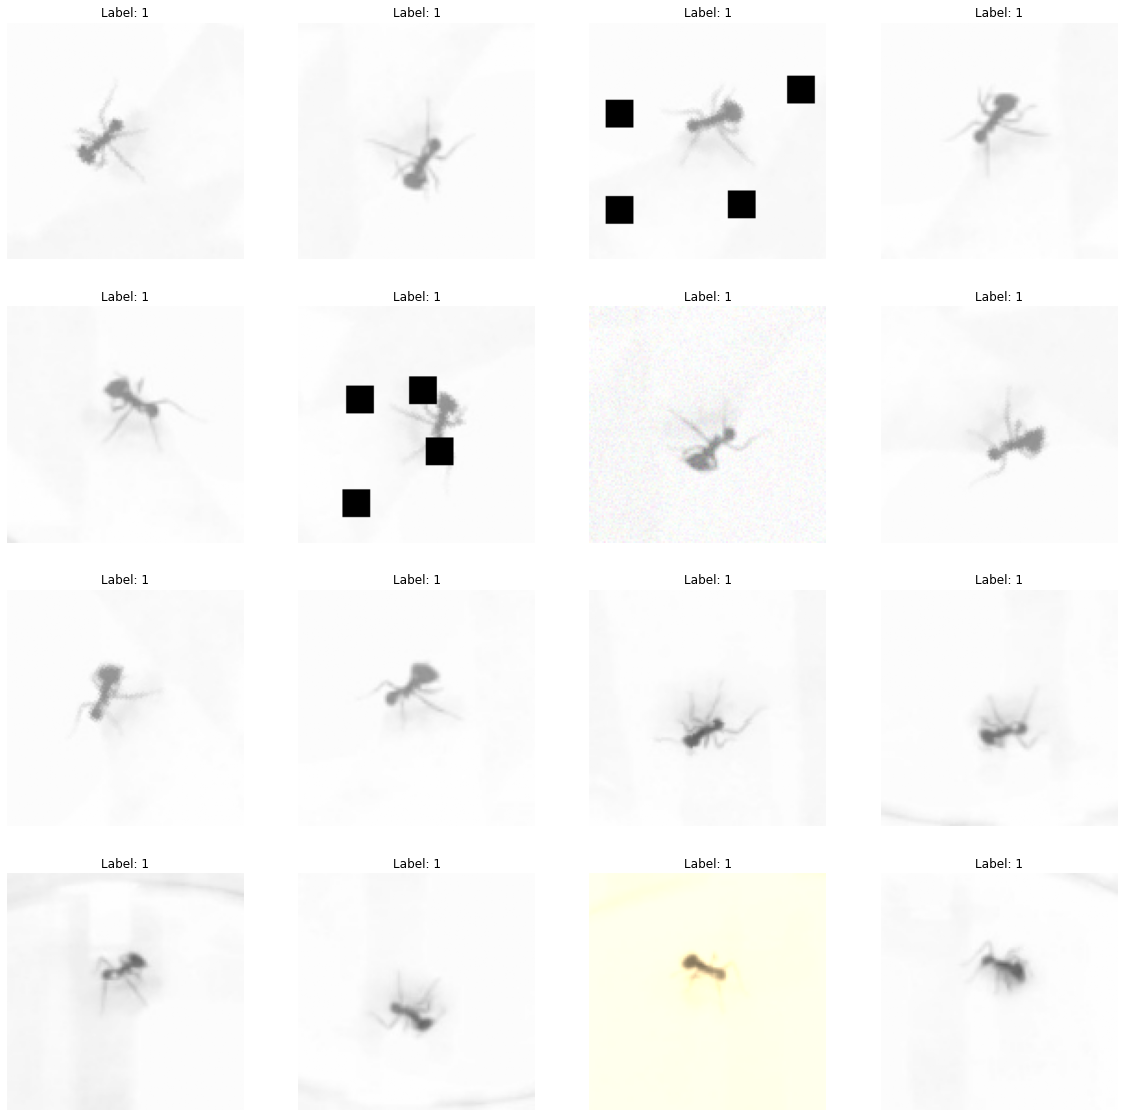

In [94]:
display_multiple_img(images_trans, 4, 4)

In [41]:
p = display_multiple_img(images_trans, 4, 4, 'idk.png')

TypeError: display_multiple_img() takes from 1 to 3 positional arguments but 4 were given

In [23]:
fig, axes  = plt.figure(figsize=(8, 8))
rows, cols = 4, 4

for i in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, i+1))
    subplot_title=("Label:"+str(label[i]))
    axes[-1].set_title(label[i])  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 576x576 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(40,40))

for idx, (data,label) in enumerate(dataloader):
    ax1, ax2, ax3 = axes[i]
    ax1.imshow(x_train[i])
    ax1.axis('off') # for removing axis
    ax2.axis('off')
    ax3.axis('off')
    #ax1.set_title('Original Image')
    ax2.imshow(y_train[i][:,:,1])
    #ax2.set_title('True Mask')
    ax3.imshow(prediction[i])
    #ax3.set_title('Predicted Mask')

plt.subplots_adjust(hspace = 0, wspace = 0)
plt.show()

In [4]:
datas, labels = next(iter(dataloader))
batch = list(zip(datas, labels))

# Grab the first (data, label) pair from the zipped list
example = batch[1]
data, label = example

In [7]:
label

tensor([2, 3, 1, 3, 1, 0, 3, 3, 1, 1, 2, 2, 3, 2, 2, 3])

In [34]:
len(datas)

16

In [36]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(0, len(datas)):
    #convert to numpy
    data_np = data[i].numpy()
    data_np = np.transpose(data_np, (1,2,0)) # so it doesn't have weird colors


    figure.add_subplot(row[i], col[i], i)
    plt.title(labels[i])
    plt.axis("off")
    plt.imshow(data_np)
plt.show()

ValueError: axes don't match array

<Figure size 576x576 with 0 Axes>

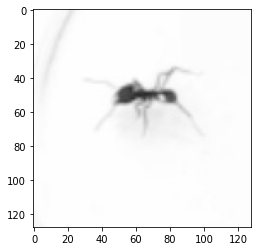

In [31]:
for data, label in zip(datas, labels):

    data_np = data.numpy()
    # Transpose C,W,H to W,H,C for OpenCV
    data_np = np.transpose(data_np, (1, 2, 0))

    # Round to nearest whole number
    data_np = np.around(data_np)

    # Truncate negative numbers
    data_np[data_np < 0] = 0

    # Truncate out-of-bounds numbers
    data_np[data_np > 255] = 255

    # Convert from existing np.float32 to np.uint8 (unsigned 8-bit integer)
    data_np = data_np.astype(np.uint8)

    plt.imshow(data_np)



In [8]:
datas[3]

tensor([[[0.9804, 0.9804, 0.9765,  ..., 0.9961, 0.9922, 0.9922],
         [0.9804, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9922],
         [0.9765, 0.9765, 0.9765,  ..., 0.9961, 0.9922, 0.9922],
         ...,
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882]],

        [[0.9804, 0.9804, 0.9765,  ..., 0.9961, 0.9922, 0.9922],
         [0.9804, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9922],
         [0.9765, 0.9765, 0.9765,  ..., 0.9961, 0.9922, 0.9922],
         ...,
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882]],

        [[0.9804, 0.9804, 0.9765,  ..., 0.9961, 0.9922, 0.9922],
         [0.9804, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9922],
         [0.9765, 0.9765, 0.9765,  ..., 0.9961, 0.9922, 0.

In [4]:
data_np = datas[0].numpy()
print('Checking out dataset:')
print(data_np.shape)
print(data_np.dtype)
print(np.min(data_np))
print(np.max(data_np))
print(label)

# Transpose C,W,H to W,H,C for OpenCV
#data_np = np.transpose(data_np, (1, 2, 0))

# Convert range from [0.0, 1.0] to [0, 255]
#data_np = data_np * 255.0

# Round to nearest whole number
data_np = np.around(data_np)

# Truncate negative numbers
#data_np[data_np < 0] = 0

# Truncate out-of-bounds numbers
#data_np[data_np > 255] = 255

# Convert from existing np.float32 to np.uint8 (unsigned 8-bit integer)
#data_np = data_np.astype(np.uint8)

plt.imshow(data_np)

Checking out dataset:
(3, 128, 128)
float64
0.5372549019607843
1.0


NameError: name 'label' is not defined

In [16]:
data[0].shape

torch.Size([3, 128, 128])

TypeError: Invalid shape (3, 128, 128) for image data

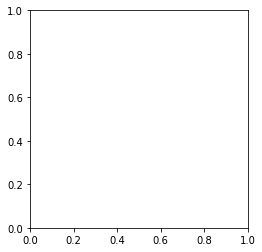

In [23]:
plt.imshow(data[0])